In [5]:
!pip install numpy pandas matplotlib seaborn scikit-learn

ERROR! Session/line number was not unique in database. History logging moved to new session 21



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the MNIST dataset (first 5 classes)
df_train = pd.read_csv("mnist_train.csv") # training set
df_test = pd.read_csv("mnist_test.csv") # test set

# We are only working with samples from class 0 to 4
df_train = df_train[df_train['label'] < 5]
df_test = df_test[df_test['label'] < 5]

# Separate the features and labels, collecting them
X_train = df_train.iloc[:, 1:].values / 255.0  # Normalize pixel values
y_train = df_train.iloc[:, 0].values

X_test = df_test.iloc[:, 1:].values / 255.0
y_test = df_test.iloc[:, 0].values

# Split the training set into 90% training and 10% validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")


Training set size: 27536
Validation set size: 3060
Test set size: 5139


In [7]:
# Hyperparameters for the neural network

num_hiddens = [16, 32] # 16 neurons in first layer, 32 in second hidden layer
alpha = 0.001 # learning rate
num_epochs = 1000
batch_size = 100


In [ ]:
# Initialize empty lists to hold the errors for all batch sizes

print(f"Training MLP with {num_hiddens} hidden units, batch size {batch_size}, and learning rate {alpha}")

# Initialize the MLP model with current batch size
mlp = MLPClassifier(
    hidden_layer_sizes=(16, 32),  # 16 neurons in first layer, 32 in second layer
    learning_rate_init=alpha,     # Learning rate
    max_iter=1,                   # Set max_iter to 1 to control epochs manually
    batch_size=batch_size,        # Batch size
    random_state=42,              # Random seed
    warm_start=True               # Allows incremental training
)

# Lists to store errors for this batch size
train_errors = []
val_errors = []

# Training loop
for epoch in range(num_epochs):
    # Train the model incrementally
    mlp.partial_fit(X_train, y_train, classes=np.unique(y_train))

    # Calculate training and validation errors
    train_pred = mlp.predict(X_train)
    val_pred = mlp.predict(X_val)

    train_accuracy = accuracy_score(y_train, train_pred)
    val_accuracy = accuracy_score(y_val, val_pred)

    train_errors.append(1 - train_accuracy)
    val_errors.append(1 - val_accuracy)

    if (epoch + 1) % 50 == 0:
        print(f"Epoch {epoch+1}/{num_epochs} - Training Error: {train_errors[-1]:.4f} - Validation Error: {val_errors[-1]:.4f}")

# Final accuracy report
print(f"Training Accuracy: {1 - train_errors[-1]:.4f}")
print(f"Validation Accuracy: {1 - val_errors[-1]:.4f}")

# Please note that the error below was fixed and placed in another kernel, but does not impact the results, as only the plotting was shifted to the next kernel.


Training MLP with [16, 32] hidden units, batch size 100, and learning rate 0.001
Epoch 50/1000 - Training Error: 0.0002 - Validation Error: 0.0154
Epoch 100/1000 - Training Error: 0.0000 - Validation Error: 0.0137
Epoch 150/1000 - Training Error: 0.0000 - Validation Error: 0.0118
Epoch 200/1000 - Training Error: 0.0000 - Validation Error: 0.0118
Epoch 250/1000 - Training Error: 0.0000 - Validation Error: 0.0111
Epoch 300/1000 - Training Error: 0.0000 - Validation Error: 0.0108
Epoch 350/1000 - Training Error: 0.0011 - Validation Error: 0.0141
Epoch 400/1000 - Training Error: 0.0000 - Validation Error: 0.0105
Epoch 450/1000 - Training Error: 0.0000 - Validation Error: 0.0118
Epoch 500/1000 - Training Error: 0.0000 - Validation Error: 0.0111
Epoch 550/1000 - Training Error: 0.0014 - Validation Error: 0.0137
Epoch 600/1000 - Training Error: 0.0000 - Validation Error: 0.0101
Epoch 650/1000 - Training Error: 0.0000 - Validation Error: 0.0108
Epoch 700/1000 - Training Error: 0.0000 - Validat

NameError: name 'batch_sizes' is not defined

<Figure size 1000x600 with 0 Axes>

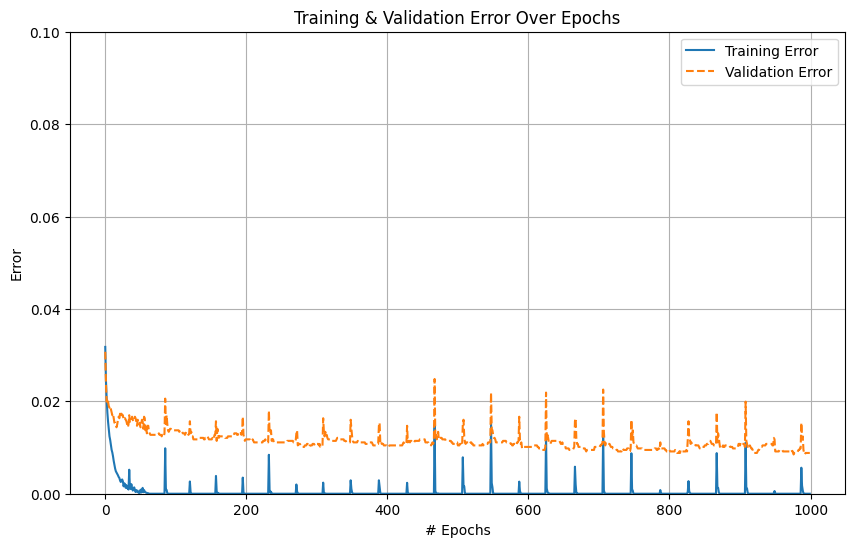

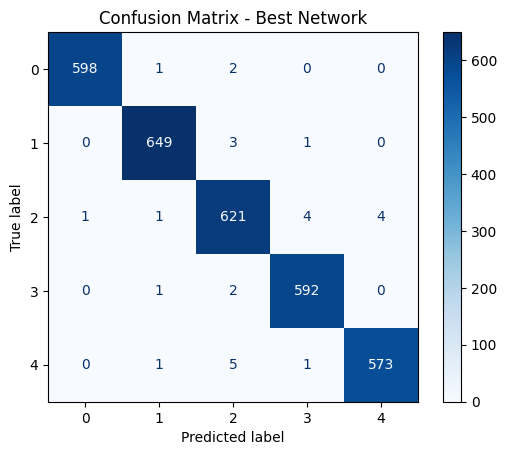

In [12]:
# Plot Errors
plt.figure(figsize=(10, 6))
plt.plot(range(num_epochs), train_errors, label="Training Error")
plt.plot(range(num_epochs), val_errors, label="Validation Error", linestyle='--')

# Add labels and title
plt.xlabel("# Epochs")
plt.ylabel("Error")
plt.title("Training & Validation Error Over Epochs")
plt.legend()
plt.grid(True)
plt.ylim(0, 0.1)
plt.show()

from sklearn.metrics import ConfusionMatrixDisplay

# Compute predictions for the validation set
y_pred = mlp.predict(X_val)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=np.unique(y_train))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Best Network")
plt.show()